<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

## ET5003_CS6134  Machine Learning Applications
## SEM1 2022/3

### ET5003_CS6134 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
October 3rd, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">TODO: add your name here</span>
### Student Surname: <span style="color:red">TODO: add your surname here</span>
### Student ID: <span style="color:red">TODO: add your student ID here</span>
### Date of Final Submission: <span style="color:red">TODO: put the date when you submitted for grading</span>
***

### Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in the interactive lesson “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures. 

## The real-life scenario
Let’s suppose that a UL student is taking the ET5003 module “Machine Learning Applications”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity. 

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

<span style="color:red">TODO: your description goes here</span>

### Step 1.2. Draw and show the DAG (7%)

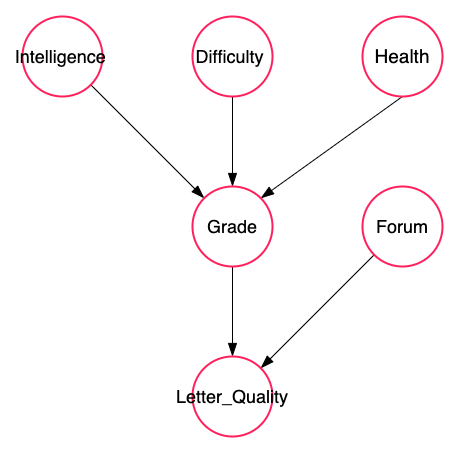

In [158]:
# your code goes here
from IPython.display import Image

Image("Etivity2_DAG.png")

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

In [159]:
# your code goes here
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

In [160]:
graph = [('grade', 'letter_quality'), 
         ('forum', 'letter_quality'),
         ('intelligence', 'grade'),
         ('difficulty', 'grade'),
         ('health', 'grade')]
model = BayesianNetwork(graph) 

### Step 1.4. Show the DAG of the Bayesian Network (1%)

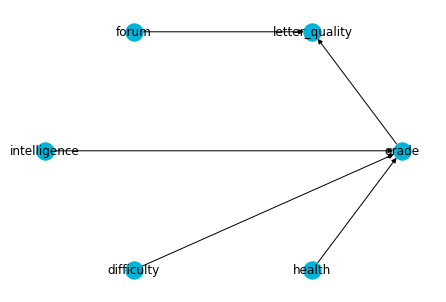

In [161]:
# your code goes here
pos = nx.circular_layout(model)
nx.draw(model, node_color='#00b4d9', pos=pos, with_labels=True)
plt.show()
plt.close()

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

X<sub>intelligence</sub> = {low=0, high=1} <br/>
X<sub>difficulty</sub> = {easy=0, hard=1}<br/>
X<sub>health</sub> = {sick=0, health=1}<br/>
X<sub>grade</sub> = {A=0, B=1, C=2}<br/>
X<sub>forum</sub> = {active=0, not_active=1}<br/>
X<sub>letter_quality</sub> = {weak=0, strong=1}<br/>

In [162]:
#**** define the Conditional Probability Distributions (CPDs)
#
# the TabularCPD class associates the ditribution model to be constructed with a random variable, 

cpd_intelligence = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="intelligence",

    # define the cardinality of the variable domain, i.e., binary = 2 -> domain = {yes, no} 
    variable_card=2,
    
    # define the distribution table 
    values=[[0.7], [0.3]] 
)    

cpd_difficulty = TabularCPD (
    variable="difficulty",
    variable_card=2,
    values=[[0.6], [0.4]]
)

cpd_health = TabularCPD (
    variable="health",
    variable_card=2,
    values=[[0.2], [0.8]]
)  

cpd_forum = TabularCPD (
    variable="forum",
    variable_card=2,
    values=[[0.55], [0.45]]
)  


# define CPD
cpd_grade = TabularCPD (
    variable="grade",
    variable_card=3,

    # define the distribution table    
    values=[[0.1,0.15,0.05,0.1,0.6,0.75,0.3,0.5],
            [0.2,0.35,0.15,0.4,0.3,0.2,0.4,0.3],
            [0.7,0.5,0.8,0.5,0.1,0.05,0.3,0.2]],

    # define the evidences
    evidence=["intelligence", "difficulty", "health"],
    evidence_card=[2,2,2]
) 


cpd_letter_quality = TabularCPD (
    variable="letter_quality",
    variable_card=2,
    evidence=["forum", "grade"],
    values=[[0.1,0.4,0.7,0.2,0.5,0.9], 
            [0.9,0.6,0.3,0.8,0.5,0.1]],
    evidence_card=[2,3]
) 

### Step 2.2: Associate the distribution models with the network structure (2%)

In [163]:
# your code goes here
# we associate the distribution models with the network structure, i.e., with the random variables
model.add_cpds(cpd_intelligence, cpd_difficulty, cpd_health, cpd_grade, cpd_forum, cpd_letter_quality)

### Step 2.3: Check the model (2%)

In [164]:
# your code goes here
model.check_model()

True

## Step 3: Inference with the Bayesian Network (30%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (10%)

In [165]:
# your code goes here
from pgmpy.inference import VariableElimination
 
infer = VariableElimination(model)

In [166]:
# show the posterior probability results
# your code goes here
posterior_p = infer.query(['grade'], evidence={'letter_quality': 1})
print(posterior_p)

+----------+--------------+
| grade    |   phi(grade) |
+==========+==============+
| grade(0) |       0.4686 |
+----------+--------------+
| grade(1) |       0.3512 |
+----------+--------------+
| grade(2) |       0.1802 |
+----------+--------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [167]:
# your code goes here
prior_p = infer.query(['letter_quality'], evidence={})

In [168]:
# show the prior probability results
# your code goes here
print(prior_p)

+-------------------+-----------------------+
| letter_quality    |   phi(letter_quality) |
+===================+=======================+
| letter_quality(0) |                0.5095 |
+-------------------+-----------------------+
| letter_quality(1) |                0.4905 |
+-------------------+-----------------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [169]:
# your code goes here
prior_p = infer.query(['letter_quality'], evidence={'forum': 1})

In [170]:
# show the prior probability results
# your code goes here
print(prior_p)

+-------------------+-----------------------+
| letter_quality    |   phi(letter_quality) |
+===================+=======================+
| letter_quality(0) |                0.5877 |
+-------------------+-----------------------+
| letter_quality(1) |                0.4123 |
+-------------------+-----------------------+
